# Star Wars Survey

In [256]:
# Importing relevant libraries
import pandas as pd
import numpy as np

In [257]:
# Read in the data
star_wars = pd.read_csv('star_wars.csv', encoding='ISO-8859-1')

In [258]:
# Printing first 10 rows
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [259]:
# Checking column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [260]:
# Removing all entries with null values in RespondentID column
star_wars = star_wars[star_wars.RespondentID.notnull()]

In [261]:
# Mapping values using dictionary
yes_no = {'Yes':True, 'No':False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [262]:
# Checking updated values
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [263]:
# Checking updated values
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [264]:
# Renaming columns 3:9
col_mapping = {star_wars.columns[3]:'seen_1',
               star_wars.columns[4]:'seen_2',
               star_wars.columns[5]:'seen_3',
               star_wars.columns[6]:'seen_4',
               star_wars.columns[7]:'seen_5',
               star_wars.columns[8]:'seen_6'}

star_wars.rename(mapper=col_mapping, axis=1, inplace=True)

In [265]:
# Mapping movie names in columns 3:9
movie_mapping = {'Star Wars: Episode I  The Phantom Menace': True,
                 'Star Wars: Episode II  Attack of the Clones':True,
                 'Star Wars: Episode III  Revenge of the Sith':True,
                 'Star Wars: Episode IV  A New Hope':True,
                 'Star Wars: Episode V The Empire Strikes Back':True,
                 'Star Wars: Episode VI Return of the Jedi':True,
                 np.NaN : False}

for col in star_wars.columns[3:9]:
    star_wars[col] = star_wars[col].map(movie_mapping)

In [266]:
# Printint first 5 rows
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [267]:
# Changing data type to float for columns 9:15
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [268]:
# Mapping new names to ranking columns
ranking_dict = {star_wars.columns[9]:'ranking_1',
                star_wars.columns[10]:'ranking_2',
                star_wars.columns[11]:'ranking_3',
                star_wars.columns[12]:'ranking_4',
                star_wars.columns[13]:'ranking_5',
                star_wars.columns[14]:'ranking_6'}

star_wars.rename(mapper=ranking_dict, axis=1, inplace=True)

In [269]:
# Averaging ratings received by every movie
star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline

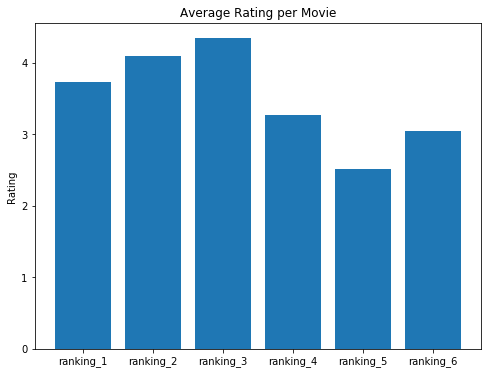

In [271]:
# Plotting a bar graph of average ratings per movie
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(star_wars.columns[9:15], star_wars[star_wars.columns[9:15]].mean())
ax.set_ylabel('Rating')
ax.set_title('Average Rating per Movie')

plt.show()

SO far we have cleaned the dataset by:
1. Removing rows with null values in the Respondent ID column.
2. Changing column names till column 14 in our datasets.
3. Changing values in our first 14 columns with True or False boolean values.

Also, we have calculated the mean of ranking of all movies and plotted a bar graph to visualize which movie has received the best rating of all.

Upon checking that why respondents gave these ratings, it is as per the movie ratings plus they rated old movies better than the new ones.

In [272]:
# Calculating sum of people seen who have seen movies
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

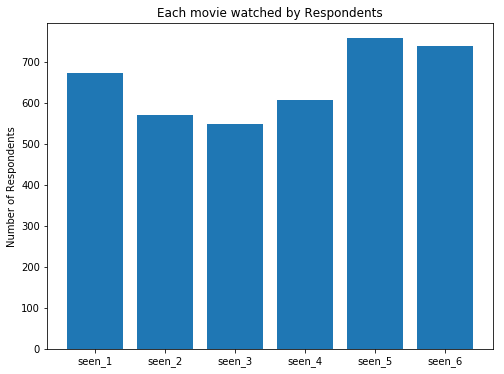

In [273]:
# Plotting above calculated sum
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(star_wars.columns[3:9], star_wars[star_wars.columns[3:9]].sum())
ax.set_ylabel('Number of Respondents')
ax.set_title('Each movie watched by Respondents')

plt.show()

The results show that more people have watched old movies more and new movies less.
Also, ratings and seen are positively correlated as for old movies people watching is high and their rating is also high, whereas, for new movies watching is less and ratings also are less.

In [274]:
# Creating separate DataFrames for Males and Females for further analysis
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

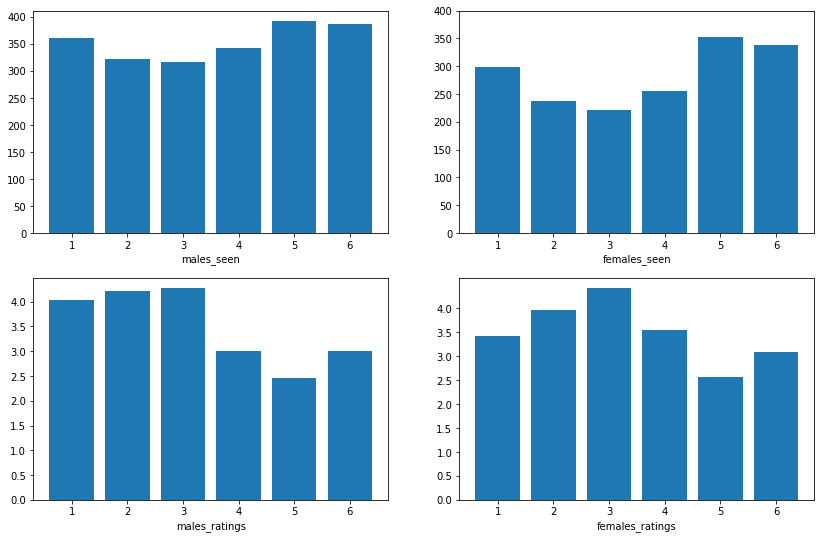

In [275]:
# Visualizing seen and rankings columns gender wise
fig, ax = plt.subplots(2,2,figsize=(14,9))

ax[0,0].bar(np.arange(1,7), males[males.columns[3:9]].sum(), data=males)
ax[0,1].bar(np.arange(1,7), females[females.columns[3:9]].sum(), data=females)
ax[1,0].bar(np.arange(1,7), males[males.columns[9:15]].mean(), data=males)
ax[1,1].bar(np.arange(1,7), females[females.columns[9:15]].mean(), data=females)

ax[0,1].set_ylim(0,400)
ax[1,1].set_yticks([0,0.5,1,1.5,2,2.5,3,3.5,4])
ax[0,0].set_xlabel('males_seen')
ax[0,1].set_xlabel('females_seen')
ax[1,0].set_xlabel('males_ratings')
ax[1,1].set_xlabel('females_ratings')

plt.show()

We can see that more males watched episodes 1-3 but likes them less than females did.

## Education

Let us select Education for segment based analysis.

In [276]:
# Checking Education columns unique values
star_wars['Education'].value_counts(normalize=True)*100

Some college or Associate degree    31.660232
Bachelor degree                     30.984556
Graduate degree                     26.544402
High school degree                  10.135135
Less than high school degree         0.675676
Name: Education, dtype: float64

We can see more than 60% of the respondents have completed Associated degree or Bachelor degree.

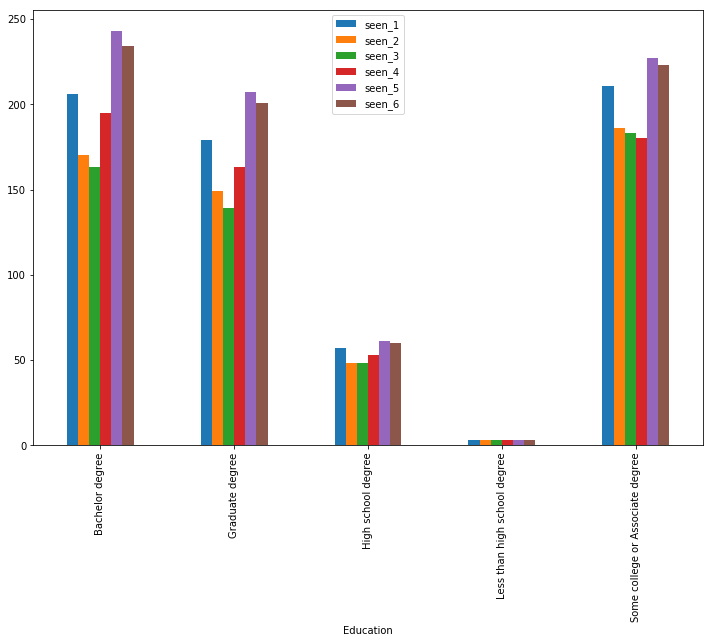

In [277]:
# Plotting sum of number of respondents with different Educational qualifications
star_wars.groupby('Education')[star_wars.columns[3:9]].sum().plot.bar(figsize=(12,8))
plt.show()

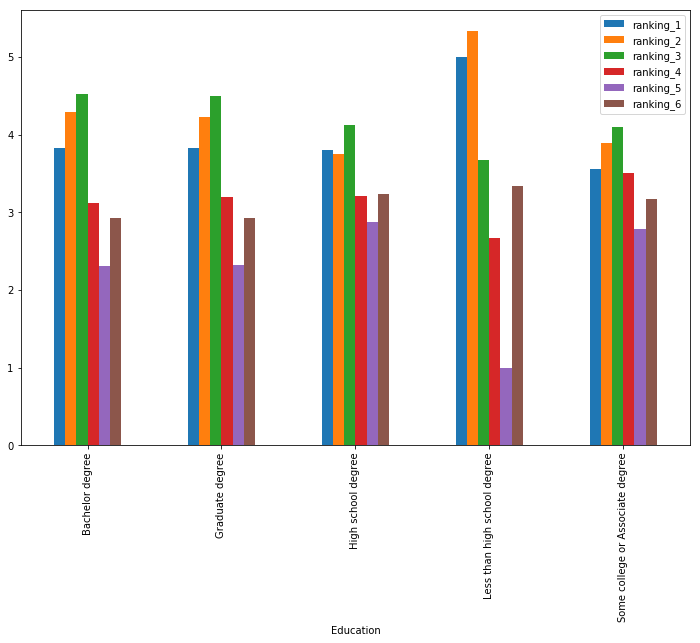

In [278]:
# Plotting average rating given to movies by different Educational qualifications
star_wars.groupby('Education')[star_wars.columns[9:15]].mean().plot.bar(figsize=(12,8))
plt.show()

If we segment on the basis of Education, we see these patterns:
- Almost every segment have watched movies 1,5 and 6 more than others.
- It is evident that all segments liked movies 3-6 movies more than 1-3.
- Respondents having educational qualifications of more than high school degree show similar patterns, 

## Location

Let us now segment on the basis of `Location (Census Region)` column.

In [279]:
# Checking Location columns unique values
star_wars['Location (Census Region)'].value_counts(normalize=True)*100

East North Central    17.353787
Pacific               16.778523
South Atlantic        16.299137
Middle Atlantic       11.697028
West South Central    10.546500
West North Central     8.916587
Mountain               7.574305
New England            7.190796
East South Central     3.643337
Name: Location (Census Region), dtype: float64

We can see most respondents are from `East North Central` region.

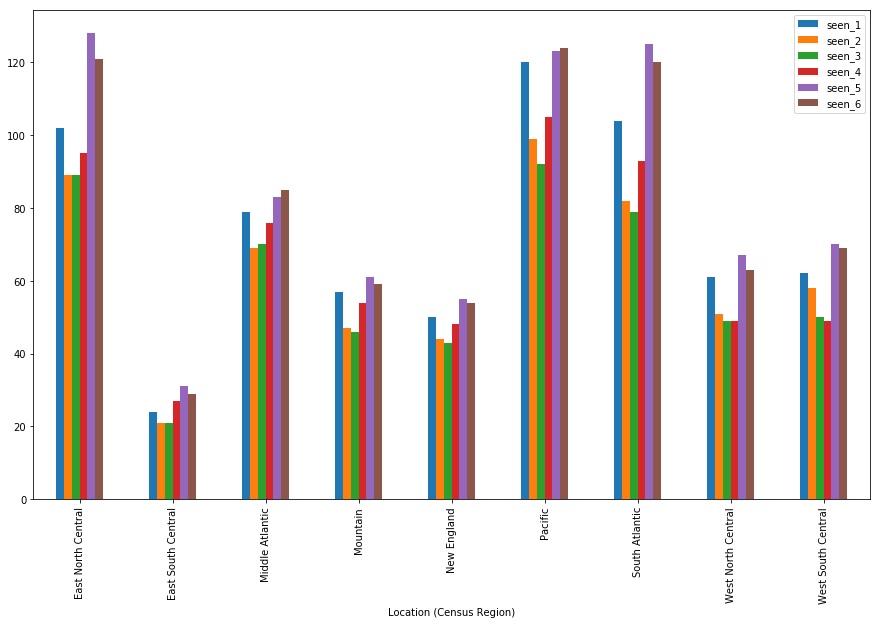

In [280]:
# Visualizing how many respondents from different segment seen different movies
star_wars.groupby('Location (Census Region)')[star_wars.columns[3:9]].sum().plot.bar(figsize=(15,9))
plt.show()

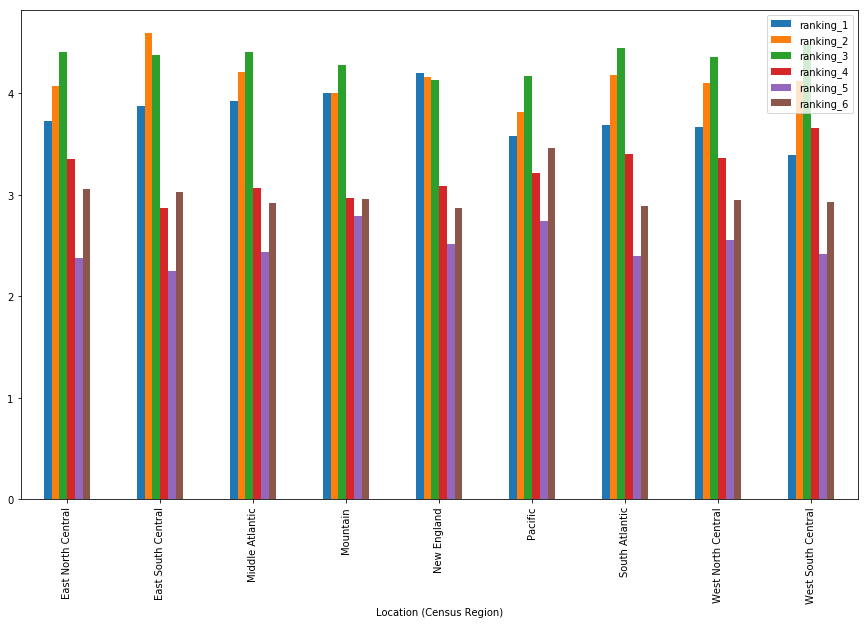

In [281]:
# Visualizing how respondents rated different movies
star_wars.groupby('Location (Census Region)')[star_wars.columns[9:15]].mean().plot.bar(figsize=(15,9))
plt.show()

We observed these points when we segmented on the basis of `Location (Census Region)` column:
- Almost all segments have 3-6 movies more and liked them most than first three.
- All segments have watched episode 5 more and liked it the most.

## Which Character Shot First?

Now, we are going to segment the data on the basis of the column: `Which Character Shot first?` which is a controversial question in Star Wars franchise.

In [282]:
# Checking unique values and frequency
star_wars['Which character shot first?'].value_counts(normalize=True)*100

Han                                 39.251208
I don't understand this question    36.956522
Greedo                              23.792271
Name: Which character shot first?, dtype: float64

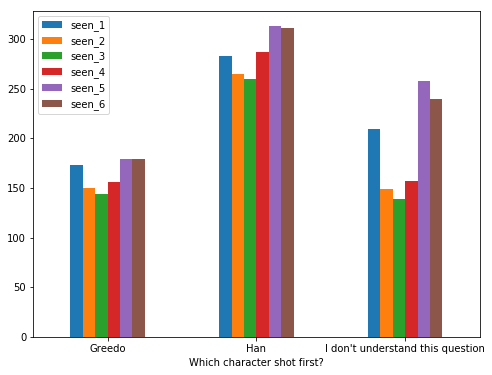

In [283]:
# Visualizing who watched movies from different segments
star_wars.groupby('Which character shot first?')[star_wars.columns[3:9]].sum().plot.bar(figsize=(8,6))
plt.xticks(rotation=0)
plt.show()

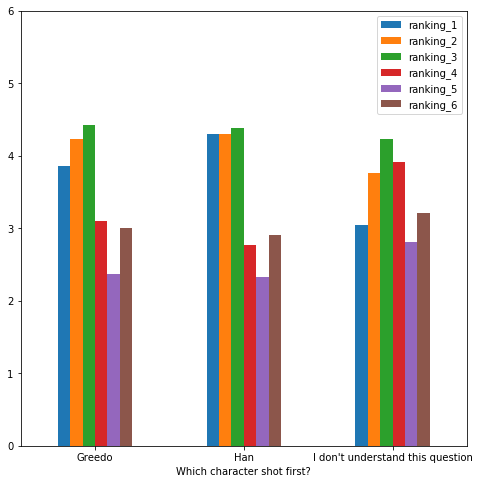

In [284]:
# Visualizing how respondents rated different movies in different segments
star_wars.groupby('Which character shot first?')[star_wars.columns[9:15]].mean().plot.bar(figsize=(8,8), ylim=(0,6))
plt.xticks(rotation=0)
plt.show()

On the basis of segmenting on `Which character shot first?` column, we can see:
- Maximum respondents have answered `Han` have watched 3-6 movies more and also liked them more than the first three.

## Cleaning Columns 15 to 29

Now we are going clean columns 15 to 29 which are about how different characters respondents view. We are going to analyse the cleaned columns for:

- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is most controversial?

In [285]:
# Checking columns 15 as it contains the question
star_wars[star_wars.columns[15]].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

In [286]:
# Printing first 5 rows to get the idea
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


In [287]:
# Converting values to a rating of 1 to 5
def character_liking(x):
    if x == 'Unfamiliar (N/A)':
        return np.NaN
    elif x == 'Very favorably':
        return 5
    elif x == 'Somewhat favorably':
        return 4
    elif x == 'Neither favorably nor unfavorably (neutral)':
        return 3
    elif x == 'Somewhat unfavorably':
        return 2
    elif x == 'Very unfavorably':
        return 1
    
star_wars[star_wars.columns[15:29]] = star_wars[star_wars.columns[15:29]].applymap(character_liking)

In [288]:
# Checking update values
star_wars[star_wars.columns[15:29]].head()

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
5,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0


In [289]:
list(range(len(star_wars.columns[15:29])))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [290]:
# Renaming columns 15 to 29
columns = star_wars.columns[15:29]
index = list(range(1,len(columns) + 1))
col_map = {}

for i in list(range(len(columns))):
    col_map[columns[i]] = 'Character_' + str(index[i])
    
star_wars.rename(mapper=col_map, axis=1, inplace=True)

In [291]:
# Printing 5 rows to check updated values
star_wars[star_wars.columns[15:29]].head()

,Character_1,Character_2,Character_3,Character_4,Character_5,Character_6,Character_7,Character_8,Character_9,Character_10,Character_11,Character_12,Character_13,Character_14
1,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,5.0,5.0,5.0,5.0,5.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,2.0,5.0,5.0,5.0,5.0,5.0
5,5.0,4.0,4.0,2.0,5.0,1.0,4.0,3.0,5.0,4.0,4.0,1.0,4.0,4.0


In [292]:
# Calculating the average of all columns
star_wars[star_wars.columns[15:29]].mean()

Character_1     4.671990
Character_2     4.580606
Character_3     4.555286
Character_4     3.775616
Character_5     4.632426
Character_6     3.071429
Character_7     3.479167
Character_8     3.636905
Character_9     3.357353
Character_10    4.403941
Character_11    4.569512
Character_12    2.780899
Character_13    3.604615
Character_14    4.629902
dtype: float64

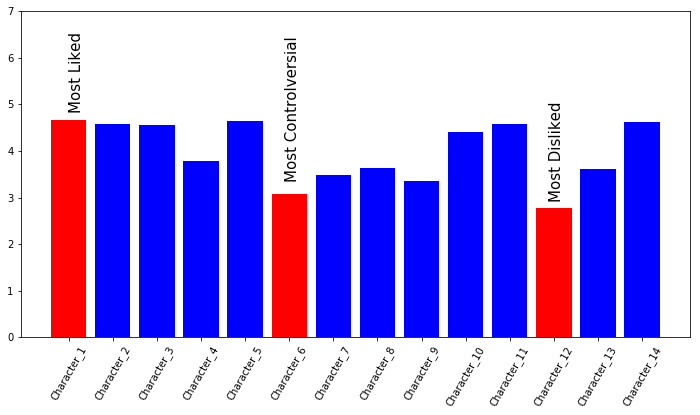

In [293]:
# Visualizing above average rating to get the answer to our question?
fig, ax = plt.subplots(figsize=(12,6))

bar_colors = []
for i in list(range(len(star_wars.columns[15:29]))):
    if i in [0,5,11]:
        bar_colors.append('R')
    else:
        bar_colors.append('B')

ax.bar(characters.columns, star_wars[star_wars.columns[15:29]].mean(), color=bar_colors)
ax.text(10.9,4.8, 'Most Disliked', rotation=90, fontsize=15)
ax.text(0,6.3, 'Most Liked', rotation=90, fontsize=15)
ax.text(4.9,6.2,'Most Controlversial', rotation=90, fontsize=15)
plt.xticks(rotation=60)
plt.ylim(0,7)

plt.show()

According to the analysis of columns 15 to 29 that we just cleaned and analysed, we can say:
- Respondents are most favorable towards `Character 1`.
- Respondents are most unfavorable towards `Character 12`.
- `Character 6` is the most controversial in terms of likes and dislikes.